In [8]:
#Task 7.1
#this code takes cleans the crime data from 2019 and 2020, and then combines them into one dataframe
#the total number of property crimes and violent crimes in years 2019 and 2020 are calculated
import os
os.chdir(r"C:\Users\[editted]\OneDrive\Desktop\College\mining big data")

import pandas as pd
import numpy as np

data_19 = pd.read_csv('2019_crime_data.csv')
data_20 = pd.read_csv('2020_crime_data.csv')

combined_data = pd.concat([data_19, data_20])

combined_data = combined_data.drop_duplicates(keep=False)
combined_data = combined_data.dropna(subset=['INCIDENT_NUMBER','OFFENSE_CODE','DISTRICT','Long','Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
combined_data.to_csv('crime_data2.csv')

df = pd.read_csv('crime_data2.csv')
df['offense_type'] = None
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
df.groupby(['offense_type', 'YEAR']).size().reset_index()

C:\Users\amyli\AppData\Local\Temp\ipykernel_13544\3003625048.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_19 = pd.read_csv('2019_crime_data.csv')
C:\Users\amyli\AppData\Local\Temp\ipykernel_13544\3003625048.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_20 = pd.read_csv('2020_crime_data.csv')
C:\Users\amyli\AppData\Local\Temp\ipykernel_13544\3003625048.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime_data2.csv')
C:\Users\amyli\AppData\Local\Temp\ipykernel_13544\3003625048.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.cont

,offense_type,YEAR,0
0,property crime,2019,13158
1,property crime,2020,12227
2,violent crime,2019,8324
3,violent crime,2020,5152


7.1
Comparing the number of crime incidents from 2019 to 2020, both property crimes and violent crimes decreased. Property crime incidents decreased by 931 incidents, and violent crime incidents decreased by 3172 incidents. 

C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\212975226.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime_data2.csv')
C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\212975226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\212975226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larcen

<AxesSubplot:xlabel='INCIDENT_NUMBER_x', ylabel='INCIDENT_NUMBER_y'>

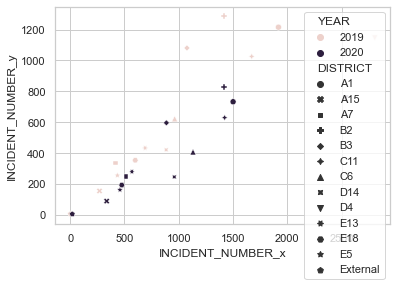

In [35]:
#task 7.2
#this code creates a scatterplot of the annual property vs. violent crimes in each district
#with different colors to represent different years

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir(r"C:\Users\[editted]\OneDrive\Desktop\College\mining big data")

df = pd.read_csv('crime_data2.csv')
sns.set(style='whitegrid')

df['offense_type'] = None
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
new_df = df.groupby(['offense_type','DISTRICT','YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
new_df
property_df = new_df.loc[lambda new_df: new_df['offense_type'] == "property crime"]

violent_df = new_df.loc[lambda new_df: new_df['offense_type'] == "violent crime"]

new_crime_df = property_df.merge(violent_df, how = 'left', on=['DISTRICT','YEAR'])

sns.scatterplot(x='INCIDENT_NUMBER_x', y='INCIDENT_NUMBER_y', data = new_crime_df, hue='YEAR', style = "DISTRICT")

C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\3351239766.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime_data2.csv')
C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\3351239766.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
C:\Users\amyli\AppData\Local\Temp\ipykernel_9432\3351239766.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|lar

<AxesSubplot:xlabel='DISTRICT', ylabel='offense_type'>

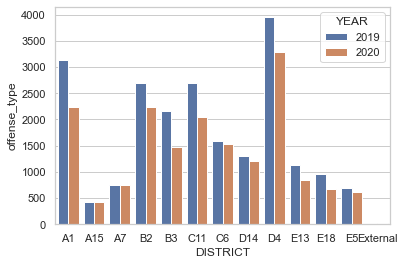

In [29]:
#task 7.3
#this code creates a barplot that presents the total number of crime and violent incidents in each district over 2 years
import pandas as pd
import seaborn as sns
import os
os.chdir(r"C:\Users\amyli\OneDrive\Desktop\College\mining big data")

df = pd.read_csv('crime_data2.csv')

df['offense_type'] = None
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
df['offense_type'][df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
total_df = df.groupby(['DISTRICT','YEAR']).agg({'offense_type': 'count'}).reset_index()
total_df

sns.barplot(x='DISTRICT', y='offense_type', data=total_df, hue = 'YEAR')

C:\Users\amyli\AppData\Local\Temp\ipykernel_8744\415953712.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  shooting_df = pd.read_csv('crime_data2.csv')


<AxesSubplot:xlabel='quarter', ylabel='SHOOTING'>

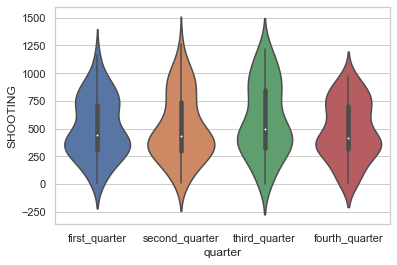

In [15]:
#task 7.4
#this code creates a violin plot of the number of shootings in each quarter

import pandas as pd
import seaborn as sns
import os
os.chdir(r"C:\Users\[editted]\OneDrive\Desktop\College\mining big data")

shooting_df = pd.read_csv('crime_data2.csv')
shooting_df = shooting_df.groupby(['DISTRICT','YEAR','MONTH']).agg({'SHOOTING':'count'}).reset_index()
shooting_df.loc[shooting_df['MONTH'].isin([1,2,3]),'quarter'] = 'first_quarter'
shooting_df.loc[shooting_df['MONTH'].isin([4,5,6]),'quarter'] = 'second_quarter'
shooting_df.loc[shooting_df['MONTH'].isin([7,8,9]),'quarter'] = 'third_quarter'
shooting_df.loc[shooting_df['MONTH'].isin([10,11,12]),'quarter'] = 'fourth_quarter'

sns.violinplot(y = 'SHOOTING', x = 'quarter', data = shooting_df)